MULTINOMIJALNA LOGISTICKA REGRESIJA - vise klasa

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

In [2]:
data = pd.read_csv("..\Data\IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
classes = data['species'].unique()

In [7]:
classes_dict = {class_name: i for i, class_name in enumerate(classes)}
classes_dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [9]:
def species_map(x):
    return x.map(classes_dict)

data[['species']] = data[['species']].apply(species_map)

In [13]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(len(df_train))
print(len(df_test))

120
30


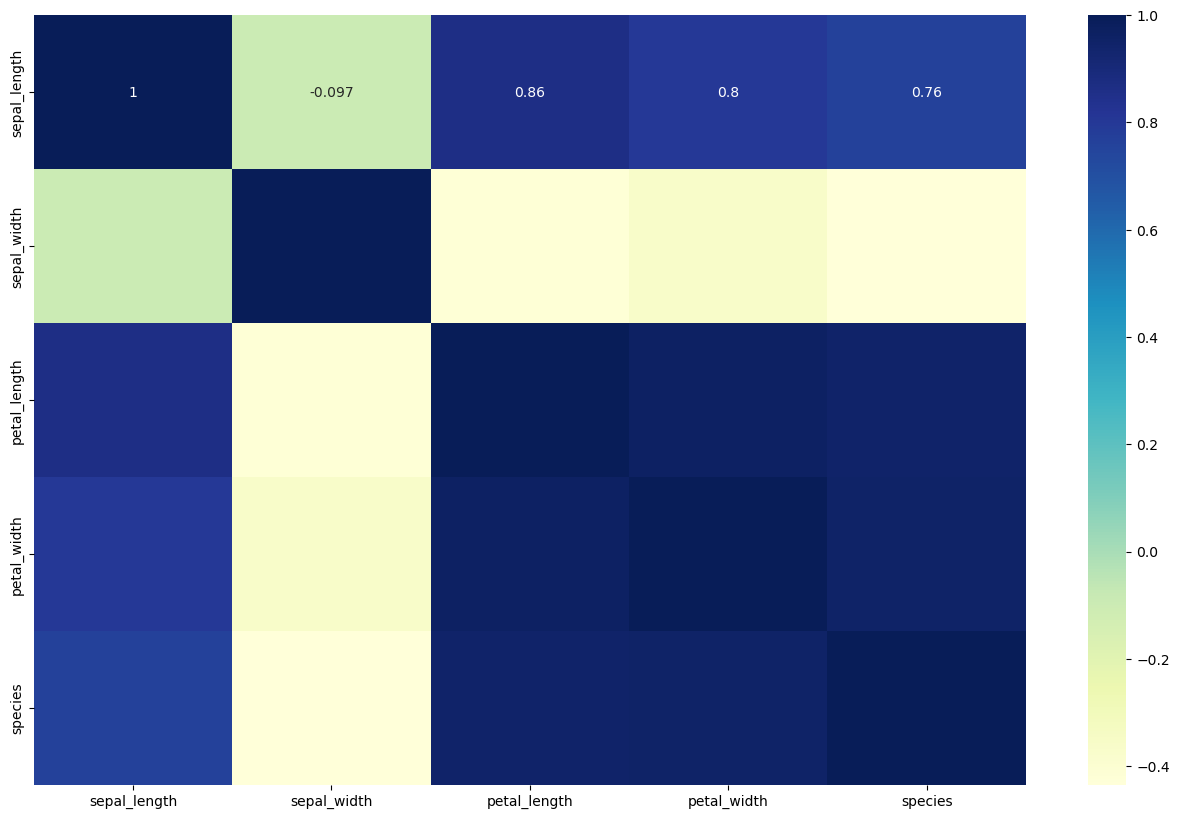

In [15]:
# GRafik prikazuje linearnu korelaciju svake dvije kolone
plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [16]:
def df_to_matrix(df):
    return df.iloc[:,:].values

y_train = np.array(df_train.pop('species'))
x_train = df_to_matrix(df_train)

y_test = np.array(df_test.pop('species'))
x_test = df_to_matrix(df_test)


In [17]:
x_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [18]:
y_test[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1], dtype=int64)

In [19]:
x_test.shape

(30, 4)

In [20]:
y_test.shape

(30,)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

class MultinomijalnaLogistickaRegresija():
    def __init__(self, num_classes, learning_rate=0.01):
        self.losses = []
        self.train_accuracies = []
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        

    def train(self, x, y, epochs=100):
        # broj podataka, broj features-a
        self.m, self.n = x.shape
        # inicijalizacija tezina
        self.W = np.zeros((self.n, self.num_classes))
        self.b = np.zeros(self.num_classes)

        for i in range(epochs):
            probabilities, y_pred = self.predict(x)

            loss = self.compute_loss(y, probabilities)
            dW, db = self.compute_gradients(x, y, probabilities)
            self.update_model_parametars(dW, db)

            self.train_accuracies.append(accuracy_score(y, y_pred))
            self.losses.append(loss.mean())
                
            print(f"Train Loss: {self.losses[-1]} | Train Accuracy: {self.train_accuracies}")

    def compute_loss(self, y_true, probabilities):
        # cross entropy
        CELoss = -np.mean(np.log([proba[i] for proba, i in zip(probabilities, y_true)])) # - jer minimiziramo
        return CELoss

    def compute_gradients(self, x, y_true, probabilities):
        # derivate of cross entropy
        probabilities[np.arange(self.m), y_true] -= 1
        dW = x.T.dot(probabilities) / self.m # gradient of loss w.r.t weights
        db = np.sum(probabilities, axis=0) / self.m # gradient of loss w.r.t bias
        
        return dW, db

    def update_model_parametars(self, dW, db):
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, x):
        x_dot_weights = x.dot(self.W) + self.b
        probabilities = np.array([self.softmax(proba) for proba in x_dot_weights])
        predictions = np.array([np.argmax(i) for i in probabilities])
        return probabilities, predictions

    def softmax(self, x):
        z = np.exp(x)
        z /= np.sum(z)
        return z

In [46]:
model = MultinomijalnaLogistickaRegresija(num_classes=3, learning_rate=7e-2)
model.train(x_train, y_train, epochs=100)

_, y_train_pred = model.predict(x_train)
accuracy_score(y_train, y_train_pred)

Train Loss: 1.0986122886681096 | Train Accuracy: [0.3333333333333333]
Train Loss: 1.0404577198548268 | Train Accuracy: [0.3333333333333333, 0.325]
Train Loss: 0.9972926746845953 | Train Accuracy: [0.3333333333333333, 0.325, 0.5416666666666666]
Train Loss: 0.9593000112978838 | Train Accuracy: [0.3333333333333333, 0.325, 0.5416666666666666, 0.6583333333333333]
Train Loss: 0.9248699530476806 | Train Accuracy: [0.3333333333333333, 0.325, 0.5416666666666666, 0.6583333333333333, 0.6583333333333333]
Train Loss: 0.8936114198182369 | Train Accuracy: [0.3333333333333333, 0.325, 0.5416666666666666, 0.6583333333333333, 0.6583333333333333, 0.6583333333333333]
Train Loss: 0.8651983605879603 | Train Accuracy: [0.3333333333333333, 0.325, 0.5416666666666666, 0.6583333333333333, 0.6583333333333333, 0.6583333333333333, 0.6583333333333333]
Train Loss: 0.8393379023981173 | Train Accuracy: [0.3333333333333333, 0.325, 0.5416666666666666, 0.6583333333333333, 0.6583333333333333, 0.6583333333333333, 0.658333333

0.9583333333333334

In [ ]:
plt.plot(model.losses)
plt.show()

In [ ]:
_, y_test_pred = model.predict(x_test)
accuracy_score(y_test, y_test_pred)

In [35]:
mlr = LogisticRegression(random_state=0).fit(x_train, y_train)
y_train_pred = (mlr.predict(x_train))
accuracy_score(y_train, y_train_pred)

0.975

In [36]:
y_test_pred = (mlr.predict(x_test))
accuracy_score(y_test, y_test_pred)

1.0